In [34]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [36]:


pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install ISLP

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [41]:
# Exercise 8: Simple Linear Regression with Auto Dataset
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence



In [42]:

print("\nFirst few rows of the data:")
print(auto_data.head())


First few rows of the data:
    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0    70   
1  15.0          8         350.0         165    3693          11.5    70   
2  18.0          8         318.0         150    3436          11.0    70   
3  16.0          8         304.0         150    3433          12.0    70   
4  17.0          8         302.0         140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


Data loaded successfully!

Initial data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB
None

Data cleaned successfully!

Cleaned data info:
<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null  

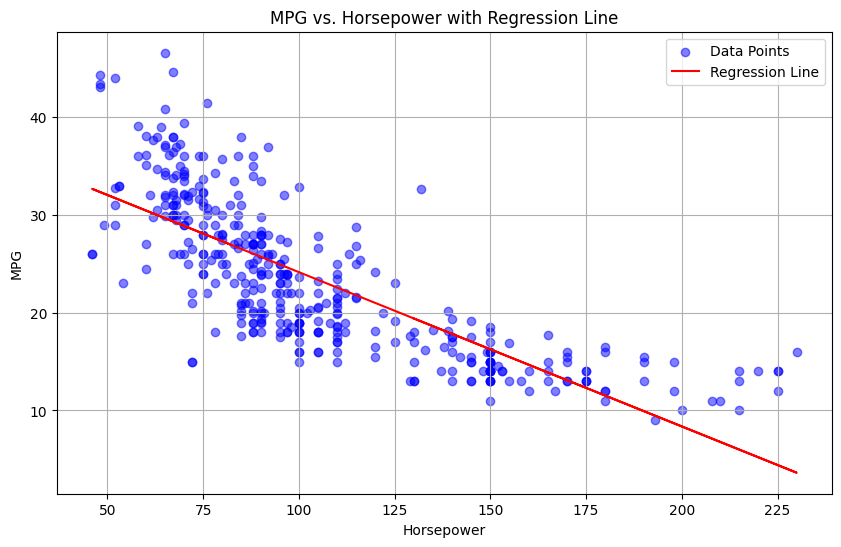

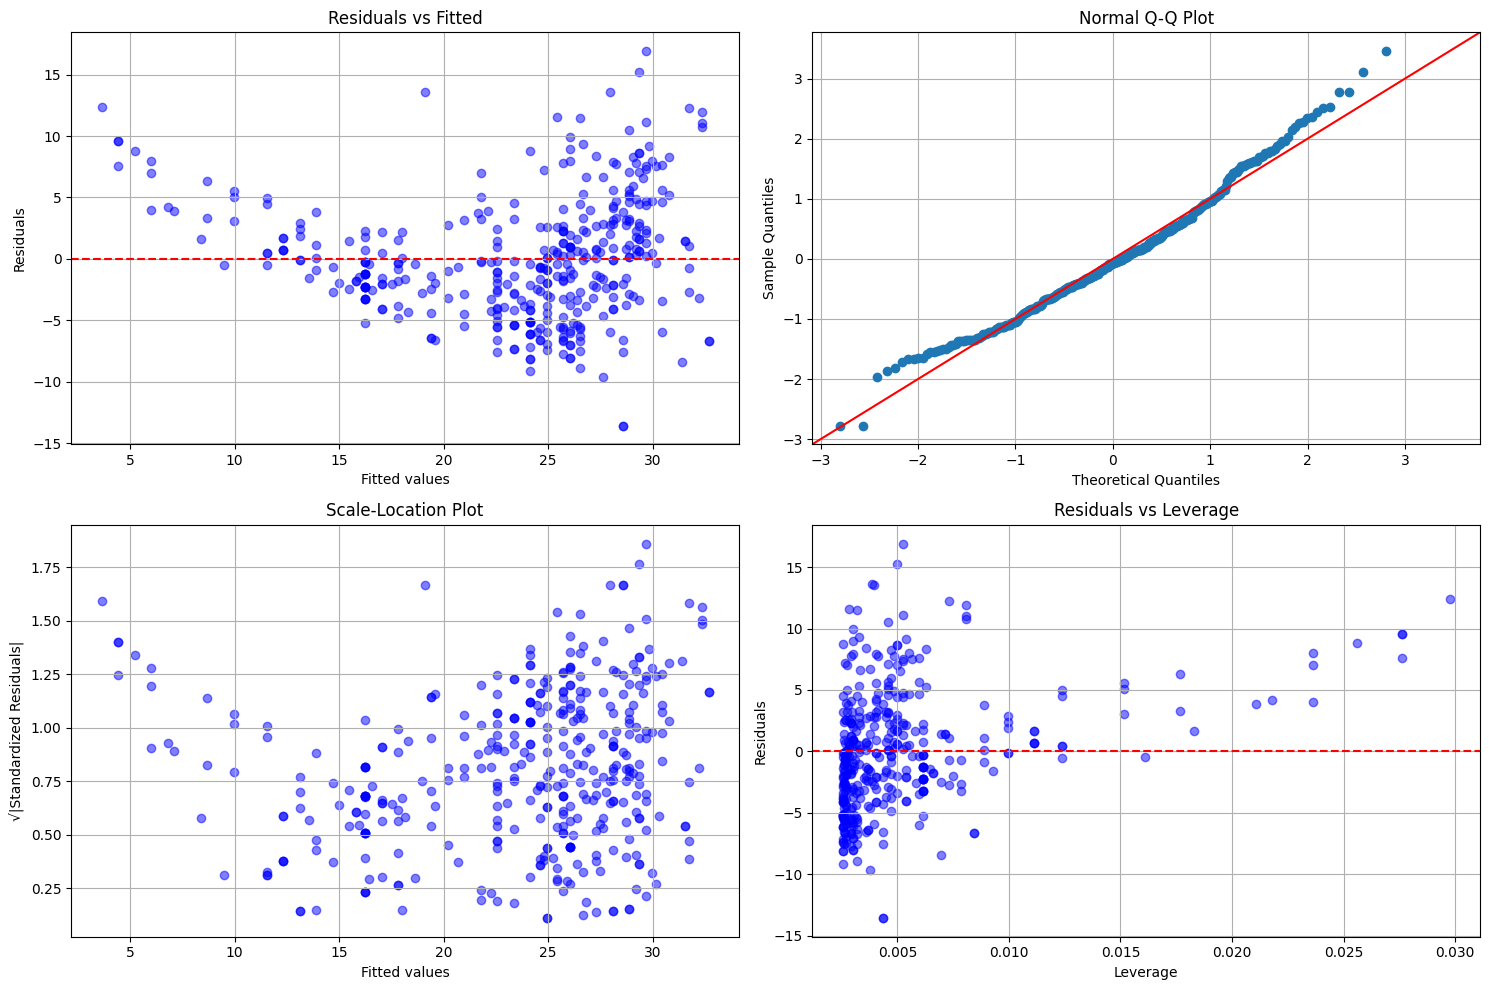


Diagnostic Analysis:
1. Residuals vs Fitted: Look for patterns that might indicate non-linearity
2. Normal Q-Q Plot: Check if residuals follow a normal distribution
3. Scale-Location: Check for homoscedasticity
4. Residuals vs Leverage: Identify influential points

Data Summary:
              mpg  horsepower
count  392.000000  392.000000
mean    23.445918  104.469388
std      7.805007   38.491160
min      9.000000   46.000000
25%     17.000000   75.000000
50%     22.750000   93.500000
75%     29.000000  126.000000
max     46.600000  230.000000


In [48]:
# Read the data
try:
    auto_data = pd.read_csv('Auto.csv')
    print("Data loaded successfully!")
    
    # Display initial info about the dataset
    print("\nInitial data info:")
    print(auto_data.info())
    
    auto_data = auto_data.replace('?', np.nan)
    auto_data = auto_data.dropna()
    
    # 2. Convert horsepower to numeric type
    auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'])
    
    # 3. Convert mpg to numeric type
    auto_data['mpg'] = pd.to_numeric(auto_data['mpg'])
    
    print("\nData cleaned successfully!")
    print("\nCleaned data info:")
    print(auto_data.info())

except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Part (a): Simple linear regression
print("\nPart (a): Simple Linear Regression Analysis")

# Prepare the data
X = sm.add_constant(auto_data['horsepower']) 

# Fit the model
model = sm.OLS(y, X).fit()

# Print summary
print("\nRegression Summary:")
print(model.summary())

# Answer questions about the relationship
print("\nAnswering questions about the relationship:")
print(f"R-squared: {model.rsquared:.4f}")
print(f"Coefficient for horsepower: {model.params['horsepower']:.4f}")
print(f"P-value for horsepower: {model.pvalues['horsepower']:.4f}")

# Predict MPG for horsepower = 98
new_hp = np.array([[1, 98]])  
prediction = model.get_prediction(new_hp)

# Get summary frame with predictions, 
prediction_summary = prediction.summary_frame()

# Extract predicted value, confidence interval, and prediction interval
predicted_mpg = prediction_summary['mean'][0]
conf_int_lower = prediction_summary['mean_ci_lower'][0]
conf_int_upper = prediction_summary['mean_ci_upper'][0]
pred_int_lower = prediction_summary['obs_ci_lower'][0]
pred_int_upper = prediction_summary['obs_ci_upper'][0]

# Display the results
print("\nPredictions for horsepower = 98:")
print(f"Predicted MPG: {predicted_mpg:.2f}")
print(f"95% Confidence Interval: ({conf_int_lower:.2f}, {conf_int_upper:.2f})")
print(f"95% Prediction Interval: ({pred_int_lower:.2f}, {pred_int_upper:.2f})")


# Part (b): Plotting
plt.figure(figsize=(10, 6))
plt.scatter(auto_data['horsepower'], auto_data['mpg'], alpha=0.5, color='blue', label='Data Points')
plt.plot(auto_data['horsepower'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs. Horsepower with Regression Line')
plt.legend()
plt.grid(True)
plt.show()

# Part (c): Diagnostic plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Residuals vs Fitted
axes[0, 0].scatter(model.fittedvalues, model.resid, color='blue', alpha=0.5)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Fitted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')
axes[0, 0].grid(True)

# 2. Q-Q plot
sm.graphics.qqplot(model.resid, line='45', fit=True, ax=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q Plot')
axes[0, 1].grid(True)

# 3. Scale-Location Plot
standardized_resid = np.sqrt(np.abs(model.resid/np.std(model.resid)))
axes[1, 0].scatter(model.fittedvalues, standardized_resid, color='blue', alpha=0.5)
axes[1, 0].set_xlabel('Fitted values')
axes[1, 0].set_ylabel('√|Standardized Residuals|')
axes[1, 0].set_title('Scale-Location Plot')
axes[1, 0].grid(True)

# 4. Leverage Plot
influence = OLSInfluence(model)
axes[1, 1].scatter(influence.hat_matrix_diag, model.resid, color='blue', alpha=0.5)
axes[1, 1].axhline(y=0, color='red', linestyle='--')
axes[1, 1].set_xlabel('Leverage')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals vs Leverage')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

# Print diagnostic comments
print("\nDiagnostic Analysis:")
print("1. Residuals vs Fitted: Look for patterns that might indicate non-linearity")
print("2. Normal Q-Q Plot: Check if residuals follow a normal distribution")
print("3. Scale-Location: Check for homoscedasticity")
print("4. Residuals vs Leverage: Identify influential points")

# Print data summary
print("\nData Summary:")
print(auto_data[['mpg', 'horsepower']].describe())
